In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Step 2: Load the Fashion MNIST dataset
data = pd.read_csv("/content/fashion-mnist_test.csv")

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 3: Normalize the data
# Scale pixel values to 0–1 for better training performance
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Step 4: Reshape data for CNN input (add a channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)  # 1 channel = grayscale
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Step 5: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.7824 - loss: 0.6081 - val_accuracy: 0.8790 - val_loss: 0.3359
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.8832 - loss: 0.3202 - val_accuracy: 0.8863 - val_loss: 0.3139
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9021 - loss: 0.2661 - val_accuracy: 0.8915 - val_loss: 0.2890
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9157 - loss: 0.2259 - val_accuracy: 0.9120 - val_loss: 0.2456
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9231 - loss: 0.2008 - val_accuracy: 0.9130 - val_loss: 0.2397
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9336 - loss: 0.1765 - val_accuracy: 0.9163 - val_loss: 0.2357
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9433 - loss: 0.1559 - val_accuracy: 0.9148 - val_loss: 0.2467
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9503 -

In [8]:
# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9112 - loss: 0.2902

✅ Test Accuracy: 0.91


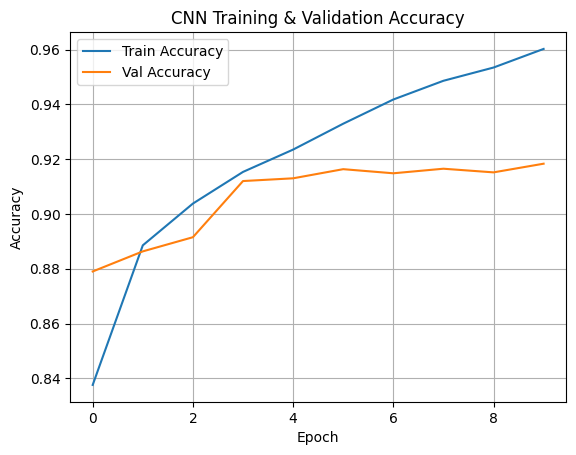

In [9]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


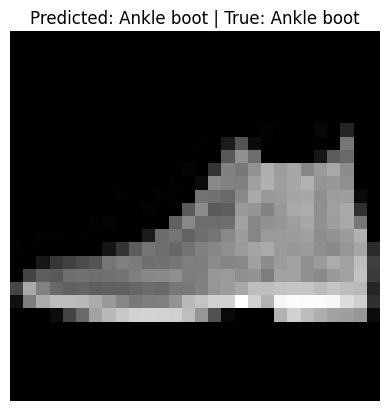

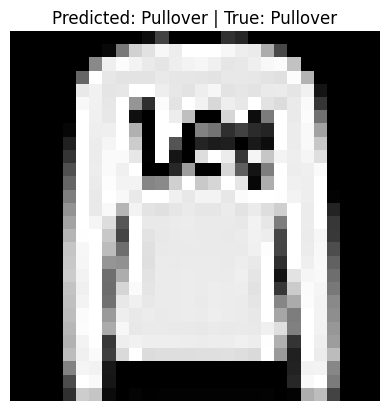

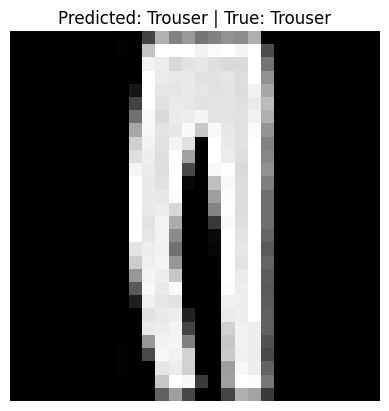

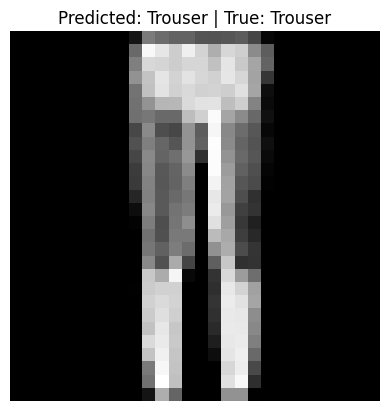

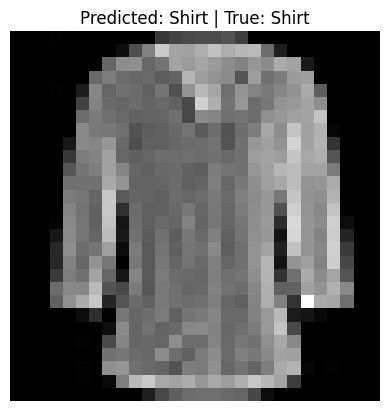

In [10]:
import numpy as np

# Class names for display
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predict on test images
predictions = model.predict(x_test)

# Display 5 test images with predicted labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]} | True: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()
